# Workbook Cardio Project

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import explore_2 as e2
import model_2 as m2
import wrangle_2 as w2


from sklearn.model_selection import train_test_split

In [2]:
# definition for getting data from csv file 
def get_cardio_data():
    '''
    get_cardio_data reads cardio_train.csv and seperates by semicolon ;
    returns df
    '''
    # read csv
    df = pd.read_csv('cardio_train.csv', sep=';')
    return df

In [3]:
df = get_cardio_data()

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


###  Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### No Null values observed

In [6]:
def create_age_in_years(df):
    '''
    create_age_in_years  takes in cardio data frame 
    and feature engineers age_in_years from age_in_days column
    
    returns df
    '''
    # create new column from age_in_days column
    df['age_in_years']= df.age_in_days//365
    return df

In [7]:
def create_bmi(df):
    '''
    create_bmi takes in cardio data frame 
    and feature engineers bmi calculation for bmi using weight_kg/height_cm
    
    returns df'''
    # create new colum from weight and height
    df['calculate_bmi']=df.weight_kg/df.height_cm
    return df

In [8]:
def label_values(df):
    '''
    label_columns takes in cardio df and relabels/replaces numeric values in gender, cholesterol, glucose
    columns for human readability
    return df'''
    
    # relabel female and male
    df['gender'] = df.gender.replace({1:'f',2:'m'})
    df['cholesterol'] = df.cholesterol.replace ({1: 'normal', 2: 'above_normal', 3: 'well_above_normal' })
    df['glucose'] = df.glucose.replace({ 1: 'normal', 2: 'above_normal', 3: 'well_above_normal' })
    return df
    


In [9]:
def dummy(df, columns):
    '''
    dummy_var takes in data frame and column list and creates dummy variables for columns
    appends dummy to main data frame
    
    returns data frame
    '''
    # create dummies
    dummy_df = pd.get_dummies(df[
                                    columns], dummy_na=False)
    
    # Concatenate dummy_df to original data frame
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [10]:
#dummy(df, ['gender','cholesterol','glucose'])

In [11]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
def prep_cardio(df):
    ''' 
    prep_cardio takes in cardio dataframe and preps data for splits,
    renames columns with appropriate units
    drops id columns
    creates new column age in years
    re-orders columns
    
    returns df
    '''
    # rename columns
    df = df.rename(columns={'age': 'age_in_days','weight': 'weight_kg','height': 'height_cm',
                           'gluc':'glucose'})
    
    # drop columns
    df = df.drop(columns ={'id'})
    
    # create new column
    df = create_age_in_years(df)
    df = create_bmi(df)
    
    #rearrange columns
    df = df.reindex(columns=['age_in_years','age_in_days', 'gender', 'height_cm', 'weight_kg', 
                    'ap_hi', 'ap_lo', 'cholesterol', 'glucose', 'smoke', 'alco', 'active', 'cardio'])
    # relabel numberic values
    df = label_values(df)
    
    df = dummy(df, ['gender','cholesterol','glucose'])

    
    return df

In [14]:
#df = df.rename(columns={'age': 'age_in_days'})

In [15]:
#df = df.rename(columns={'weight': 'weight(kg)'})

In [16]:
#df = df.rename(columns={'height': 'height(cm)'})

In [17]:
#df = df.drop(columns ={'id'})

In [18]:
15263//365

41

### * age is in days will be feature engineered into  create years columns

In [19]:
#df['age_in_years']= df.age_in_days//365

In [20]:
#df = df.reindex(columns=['age_in_years','age_in_days', 'gender', 'height(cm)', 'weight(kg)', 'ap_hi', 'ap_lo',
 #      'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [21]:
df = prep_cardio(df)

In [22]:
df

,age_in_years,age_in_days,gender,height_cm,weight_kg,ap_hi,ap_lo,cholesterol,glucose,smoke,...,active,cardio,gender_f,gender_m,cholesterol_above_normal,cholesterol_normal,cholesterol_well_above_normal,glucose_above_normal,glucose_normal,glucose_well_above_normal
0,50,18393,m,168,62.0,110,80,normal,normal,0,...,1,0,0,1,0,1,0,0,1,0
1,55,20228,f,156,85.0,140,90,well_above_normal,normal,0,...,1,1,1,0,0,0,1,0,1,0
2,51,18857,f,165,64.0,130,70,well_above_normal,normal,0,...,0,1,1,0,0,0,1,0,1,0
3,48,17623,m,169,82.0,150,100,normal,normal,0,...,1,1,0,1,0,1,0,0,1,0
4,47,17474,f,156,56.0,100,60,normal,normal,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,19240,m,168,76.0,120,80,normal,normal,1,...,1,0,0,1,0,1,0,0,1,0
69996,61,22601,f,158,126.0,140,90,above_normal,above_normal,0,...,1,1,1,0,1,0,0,1,0,0
69997,52,19066,m,183,105.0,180,90,well_above_normal,normal,0,...,0,1,0,1,0,0,1,0,1,0
69998,61,22431,f,163,72.0,135,80,normal,above_normal,0,...,0,1,1,0,0,1,0,1,0,0


In [23]:
def split_data(df, target):
    '''
    split_date takes in a dataframe  and target variable and splits into train , validate, test 
    and stratifies on target variable
    
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    
    returns train, validate, and test 
    '''
    # split test data from train/validate
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df [target])

    # split train from validate
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate[target])
                                   
    return train, validate, test

In [24]:
#dummy(df,['gender','cholesterol','glucose'])

In [25]:
train, validate, test = split_data(df, 'cardio')

In [26]:
train.dtypes

age_in_years                       int64
age_in_days                        int64
gender                            object
height_cm                          int64
weight_kg                        float64
ap_hi                              int64
ap_lo                              int64
cholesterol                       object
glucose                           object
smoke                              int64
alco                               int64
active                             int64
cardio                             int64
gender_f                           uint8
gender_m                           uint8
cholesterol_above_normal           uint8
cholesterol_normal                 uint8
cholesterol_well_above_normal      uint8
glucose_above_normal               uint8
glucose_normal                     uint8
glucose_well_above_normal          uint8
dtype: object

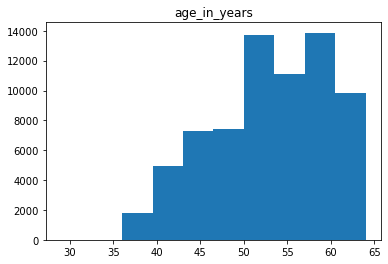

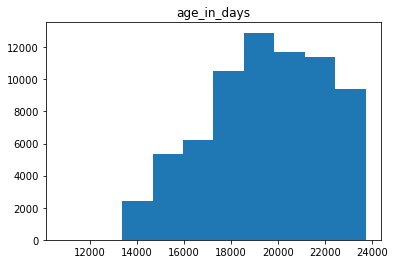

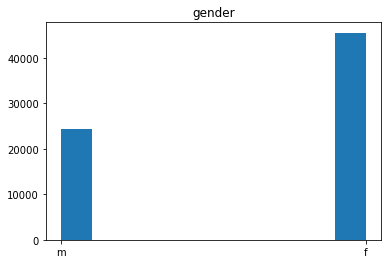

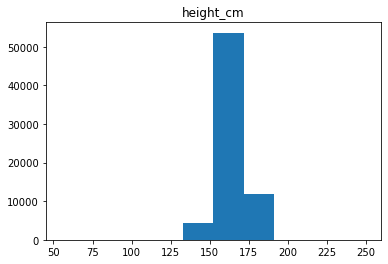

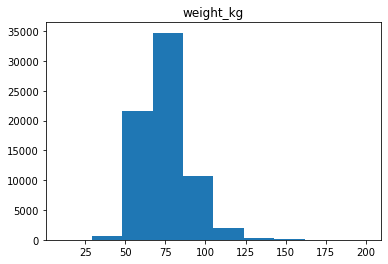

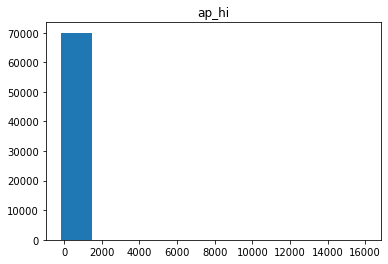

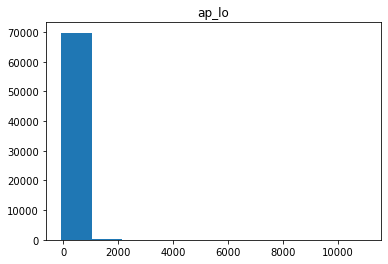

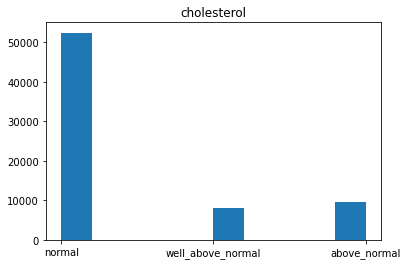

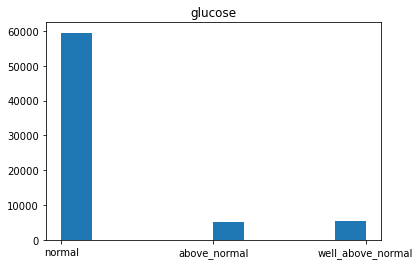

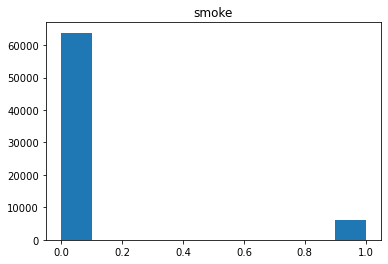

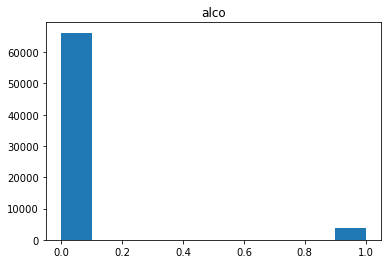

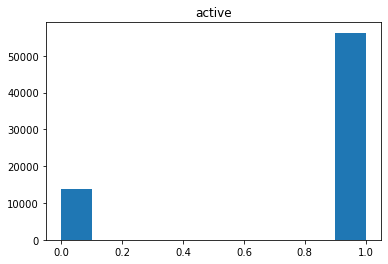

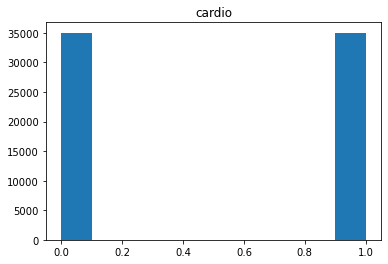

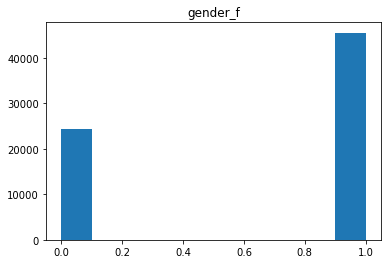

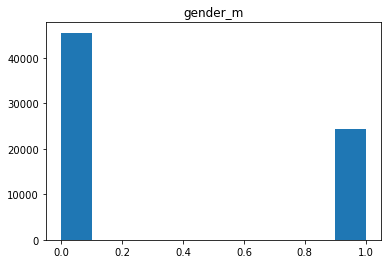

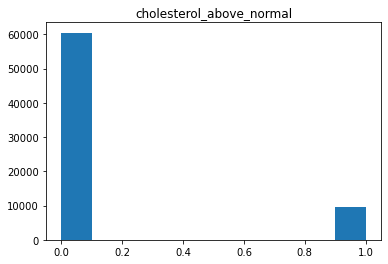

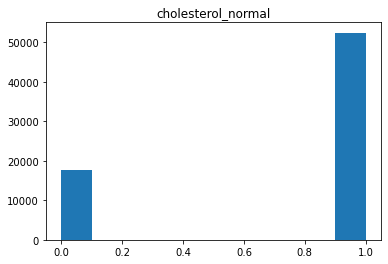

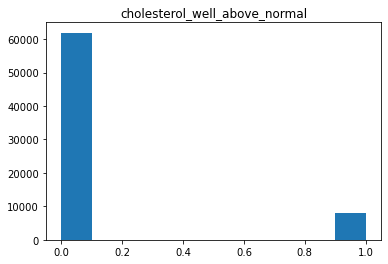

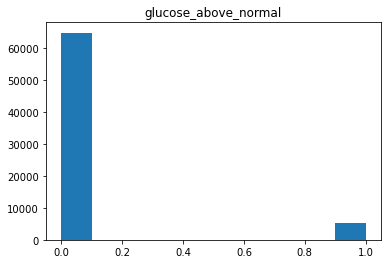

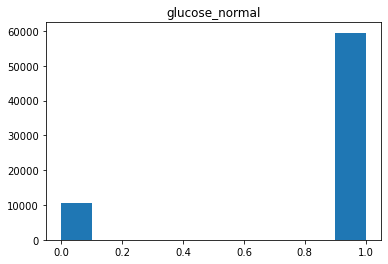

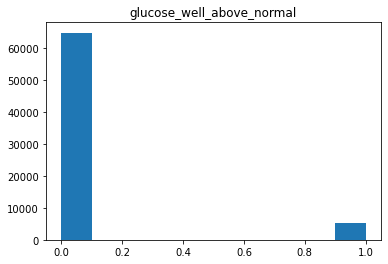

In [27]:
num_cols = train.columns
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [28]:
train.describe()

,age_in_years,age_in_days,height_cm,weight_kg,ap_hi,ap_lo,smoke,alco,active,cardio,gender_f,gender_m,cholesterol_above_normal,cholesterol_normal,cholesterol_well_above_normal,glucose_above_normal,glucose_normal,glucose_well_above_normal
count,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000,39200.000000
mean,52.866684,19478.283087,164.319337,74.117426,129.106709,96.426684,0.088010,0.054974,0.804235,0.499694,0.651378,0.348622,0.136071,0.749337,0.114592,0.073929,0.850051,0.076020
std,6.754328,2462.497384,8.224770,14.303885,166.375967,192.033816,0.283313,0.227933,0.396794,0.500006,0.476540,0.476540,0.342869,0.433400,0.318533,0.261658,0.357026,0.265034
min,30.000000,10964.000000,55.000000,11.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,17674.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,19710.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,21327.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,23713.000000,207.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

### What percent of the population have had a cardio incident?


In [ ]:
sns.